# Predictiong Heart Disease Using Machine Learning Model
## Data
Data has been taken from __[https://www.kaggle.com/ronitf/heart-disease-uci](https://www.kaggle.com/ronitf/heart-disease-uci)__
## Dataset Information
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0)

<ol>
        <li>Age:Age in Years</li>
        <li>Sex:(1=Male;0=Female)</li>
        <li>
            cp - chest pain type
            <ul>
                <li>0: Typical angina: chest pain related decrease blood supply to the heart</li>
                <li>1: Atypical angina: chest pain not related to heart</li>
                <li>2: Non-anginal pain: typically esophageal spasms (non heart related)</li>
                <li>3: Asymptomatic: chest pain not showing signs of disease</li>
            </ul>
        </li>
        <li>trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is
            typically cause for concern</li>
        <li>
            chol - serum cholestoral in mg/dl
            <ul>
                <li>serum = LDL + HDL + .2 * triglycerides</li>
                <li>above 200 is cause for concern</li>
            </ul>
        </li>
        <li>
            fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
            <ul>
                <li>'>126' mg/dL signals diabetes</li>
            </ul>
        </li>
        <li>
            restecg - resting electrocardiographic results
            <ul>
                <li>0: Nothing to note</li>
                <li>
                    1: ST-T Wave abnormality
                    <ul>
                        <li>can range from mild symptoms to severe problems</li>
                        <li>signals non-normal heart beat</li>
                    </ul>
                </li>
                <li>
                    2: Possible or definite left ventricular hypertrophy
                    <ul>
                        <li>Enlarged heart's main pumping chamber</li>
                    </ul>
                </li>
            </ul>
        </li>
        <li>thalach - maximum heart rate achieved</li>
        <li>exang - exercise induced angina (1 = yes; 0 = no)</li>
        <li>oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise
            unhealthy heart will stress more</li>
        <li>
            slope - the slope of the peak exercise ST segment
            <ul>
                <li>0: Upsloping: better heart rate with excercise (uncommon)</li>
                <li>1: Flatsloping: minimal change (typical healthy heart)</li>
                <li>2: Downslopins: signs of unhealthy heart</li>
            </ul>
        </li>
        <li>
            ca - number of major vessels (0-3) colored by flourosopy
            <ul>
                <ul>
                    <li>colored vessel means the doctor can see the blood passing through</li>
                    <li>the more blood movement the better (no clots)</li>
                </ul>
            </ul>
        </li>
        <li>
            thal - thalium stress result
            <ul>
                <li>1,3: normal</li>
                <li>6: fixed defect: used to be defect but ok now</li>
                <li>7: reversable defect: no proper blood movement when excercising</li>
            </ul>
        </li>
        <li>target - have disease or not (1=yes, 0=no) (= the predicted attribute)</li>
    </ol>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#To appear plots inside notebook
%matplotlib inline

#models from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


In [60]:
from sklearn.metrics import plot_confusion_matrix

## Loading Data

In [2]:
# Loading Data
#Heart disease dataset from Kaggle
df=pd.read_csv("Heart-Disease.csv")
df.shape

(303, 14)

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease frequency according to sex

In [7]:
#Each sex count
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [8]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


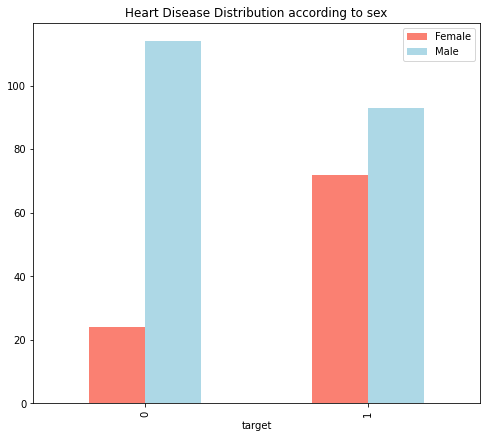

In [9]:
pd.crosstab(df.target,df.sex).plot(kind='bar',color=["salmon","lightblue"],figsize=(8,7))
plt.title("Heart Disease Distribution according to sex")
plt.legend(["Female","Male"])

### Age vs Max heart rate achieved

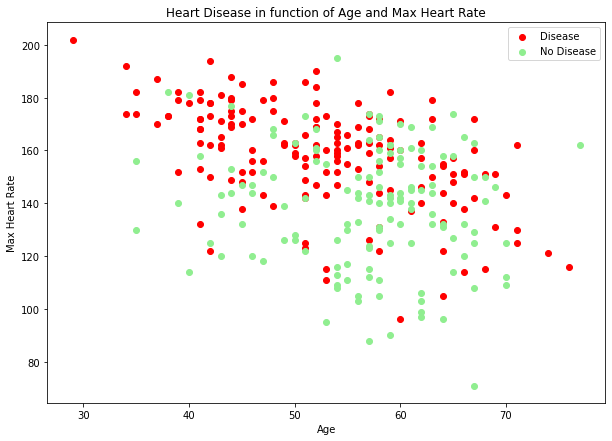

In [96]:
# Create another figure
plt.figure(figsize=(10, 7))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="Red")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightgreen")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

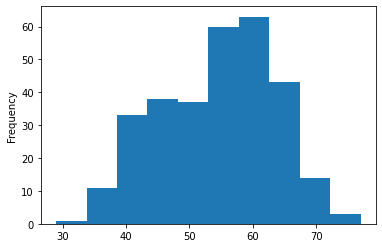

In [98]:
#checking distribution of age column
df.age.plot.hist()

df.corr()

### Correlation Plot

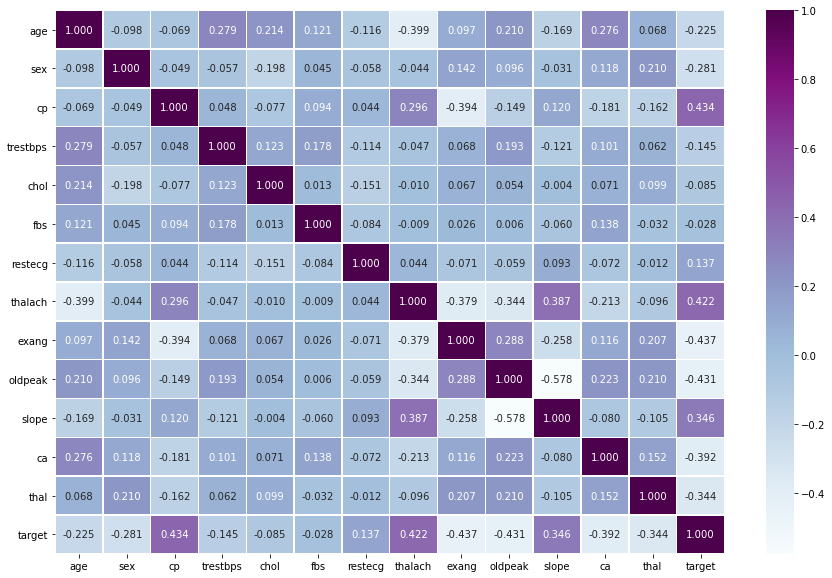

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),cmap="BuPu",annot=True,fmt=".3f",linewidths=0.5,cbar=True,ax=ax)

# Modelling

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
X=df.drop("target",axis=1)
y=df['target']
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [17]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [19]:
# Split into train & test set
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [20]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [21]:
y,len(y_train)

(0      1
 1      1
 2      1
 3      1
 4      1
       ..
 298    0
 299    0
 300    0
 301    0
 302    0
 Name: target, Length: 303, dtype: int64,
 242)

We will try three classification models
#### Logistic Regression Classifier
#### Random Forrest Classifier
#### K-Nearest Neighbors Classifier

In [100]:
models={"LogisticRegression":LogisticRegression(),"RandomForrest":RandomForestClassifier(),"KNN":KNeighborsClassifier()}
#created a function to fit model with training sets
def fit_score(models,X_train,X_test,y_train,y_test):
    model_score={}
    for key,model in models.items():
        model.fit(X_train,y_train)
        model_score[key]=model.score(X_test,y_test)
    return model_score

In [23]:
model_score=fit_score(models,X_train,X_test,y_train,y_test)
model_score

C:\Users\abhis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8852459016393442,
 'RandomForrest': 0.8524590163934426,
 'KNN': 0.6885245901639344}

### Model Comparison

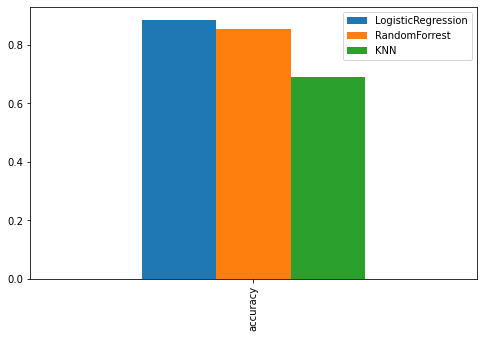

In [24]:
model_compare=pd.DataFrame(model_score,index=["accuracy"])
model_compare.plot.bar(figsize=(8,5))

## Hyperparameters Tuning

In [25]:
# Let's tune KNN

train_scores = []
test_scores = []

#k-neighbors
neighbors = range(1, 21)

knn = KNeighborsClassifier()

#calculating model score for k-neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    #appending model score for respective k-neighbors for training set
    train_scores.append(round(knn.score(X_train, y_train),5))
    #appending model score for respective k-neighbors for testing set
    test_scores.append(round(knn.score(X_test, y_test),5))

In [26]:
train_scores

[1.0,
 0.80992,
 0.77273,
 0.7438,
 0.76033,
 0.75207,
 0.7438,
 0.72314,
 0.71901,
 0.69421,
 0.72727,
 0.69835,
 0.69008,
 0.69421,
 0.68595,
 0.67355,
 0.68595,
 0.66529,
 0.68182,
 0.66942]

In [27]:
test_scores

[0.62295,
 0.63934,
 0.65574,
 0.67213,
 0.68852,
 0.72131,
 0.70492,
 0.68852,
 0.68852,
 0.70492,
 0.7541,
 0.7377,
 0.7377,
 0.7377,
 0.68852,
 0.72131,
 0.68852,
 0.68852,
 0.70492,
 0.65574]

Maximum knn test score is=75.41 %


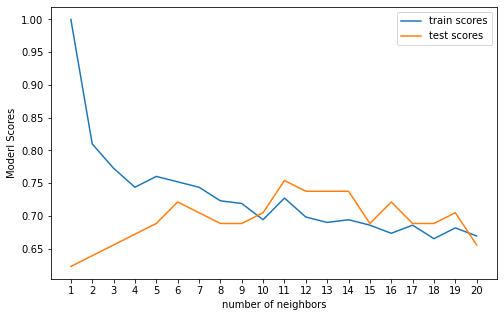

In [28]:
plt.figure(figsize=(8,5))
plt.plot(neighbors,train_scores,label="train scores")
plt.plot(neighbors,test_scores,label="test scores")
plt.xlabel("number of neighbors")
plt.ylabel("Moderl Scores")
plt.xticks(range(1,21,1))
plt.legend()
print(f"Maximum knn test score is={max(test_scores)*100:0.2f} %")

## Hyperparameter tuning with RandomizedSearchCV
Tuning LogisticRegressionClassifier() and RandomForestClassifier()

In [30]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}
# Above process is to setup parameters for tuning

#### Tuning LogisticRegression

In [49]:
# Setup random hyperparameter search for LogisticRegression
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [51]:
#Taking out best parameter for rs_log_reg
print("Parameters:",rs_log_reg.best_params_)
print("Socre for LogisticRegressionClassifier() after tuning:",rs_log_reg.score(X_test,y_test))

Parameters: {'solver': 'liblinear', 'C': 0.23357214690901212}
Socre for LogisticRegressionClassifier() after tuning: 0.8852459016393442


#### Tuning RandomForestClassifier()

In [47]:
# Setup random seed
# Setup random hyperparameter search for RandomForestClassifier
# Setup random seed
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [48]:
#Taking out best parameter for rs_rf
print("Parameters:",rs_rf.best_params_)
print("Socre for RandomForestClassifier() after tuning:",rs_rf.score(X_test,y_test))

Parameters: {'n_estimators': 210, 'min_samples_split': 4, 'min_samples_leaf': 19, 'max_depth': 3}
Socre for RandomForestClassifier() after tuning: 0.8688524590163934


LogisticRegression model provides the best scores so far

## Evaluating our classifier beyond accuracy
<p>Confusion matrix</p>
<p>Classification report</p>
<p>Precision</p>
<p>Recall</p>

In [57]:
y_pred=rs_log_reg.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [58]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

[[25  4]
 [ 3 29]]


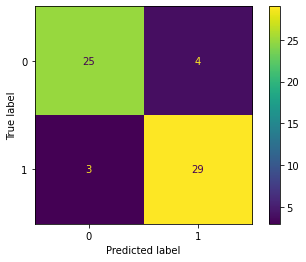

In [62]:
plot_confusion_matrix(rs_log_reg,X_test,y_test)

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Feature Importance
To check which feature has most contributed in prediction

In [68]:
#getting best parameteres of logistic regression after tuning

rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [75]:
#Creating new model using best parameters
log_clf=LogisticRegression(solver="liblinear", C= 0.23357214690901212)
#Calculate feature coefficients
log_clf.fit(X_train,y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [77]:
#check feature coefficients
log_clf.coef_

array([[ 0.00369922, -0.90424087,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490186,  0.02472938, -0.63120403, -0.57590919,
         0.4709512 , -0.6516535 , -0.69984202]])

In [80]:
feature_dict = dict(zip(df.columns, list(log_clf.coef_[0])))
feature_dict

{'age': 0.003699219011760782,
 'sex': -0.9042408714480176,
 'cp': 0.6747282766540338,
 'trestbps': -0.01161340334265323,
 'chol': -0.0017036446360052262,
 'fbs': 0.04787688669240361,
 'restecg': 0.3349018562558094,
 'thalach': 0.024729384743360134,
 'exang': -0.631204028843173,
 'oldpeak': -0.575909185434028,
 'slope': 0.47095119664446533,
 'ca': -0.6516535002884537,
 'thal': -0.6998420233395882}

##### Visualization of feature Importance

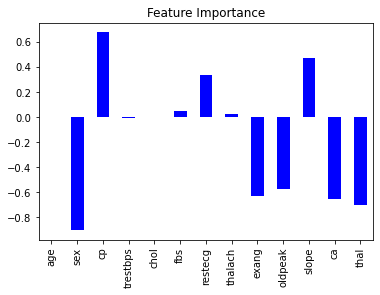

In [94]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False,color="blue");